In [46]:
%pylab inline
#%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Goal

Our goal is to extend the one dimensional problem of the previous notebook, to dimensions 2 and 3. 

# Collections of one dimensional Lagrange basis functions

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}.
$$

In [47]:
from numpy.polynomial.polynomial import Polynomial
from numpy.testing import *

We condisder a `dim`-dimensional problem. We setup a one dimensional set of basis finctions along each of `dim` direction. The first two lines in the previous notebook:
```
n = 6
q = linspace(0,1,n)
```
are substituted with two lists:
$$
\mathtt{N = [} \mathtt{n}_1,\mathtt{n}_2,\ldots, \mathtt{n}_{\mathtt{dim}}\mathtt{]}\\
\mathtt{Q = [[} \mathtt{q}_0,\ldots \mathtt{q}_{\mathtt{n}_1}\mathtt{]}\ldots\mathtt{[}\mathtt{q}_0,\ldots \mathtt{q}_{\mathtt{n}_{\mathtt{dim}}}\mathtt{]}\mathtt{]}
$$

The list `Q` is automatically generated by the program with the correct dimensionality. `dim`, and `N` can be seen as input parameters that the user has to set in a coherent way. To check that we equip this section of the program with an *assertion*. An assertion is an useful object that throws an error to defend the program from possible mistakes. The line:
```
assert_equal(dim,len(N))
```
throws an error in case the length of `N` does not match `dim`.

In [48]:
dim = 2
N = [3,2] # same size as dim
assert_equal(dim,len(N))
Q = [linspace(0,1,n) for n in N]

In [49]:
print(Q[0])

[ 0.   0.5  1. ]


We prepare a list `LL` we expect it to have `len(LL) = dim`. For each dimension we populate it with the set of basis functions along the corresponding dimension.

In [50]:
LL = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    LL += [[Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n)]]

Only for the brave:
```
LL = []
for n,q in zip(N,Q):
    LL += [[Polynomial.fromroots([xj for xj in q if xj != q[i]]) for i in range(n)]]
```

In [51]:
for d in range(dim):
    n = N[d]
    q = Q[d]
    L = LL[d]
    LL[d] = [L[i]/L[i](q[i]) for i in range(n)]

Only for the brave:
```
for n,q,L in zip(N,Q,LL):
    LL[d] = [L[i]/L[i](q[i]) for i in range(n)]
```

It is good idea to prepare lists for first and second derivatives of the basis functions. Depending on the problem formulation we will use the appropriate ones.

In [52]:
LL_prime = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    L = LL[d]
    LL_prime += [[L[i].deriv() for i in range(n)]]

The brave version:
```
for L,n in zip(LL,N):
    LL_prime += [[L[i].deriv() for i in range(n)]]
```

In [53]:
LL_prime_prime = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    L_prime = LL_prime[d]
    LL_prime_prime += [[L_prime[i].deriv() for i in range(n)]]

Try your own *brave* version...

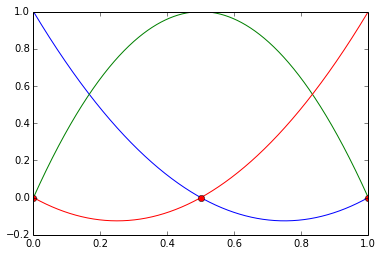

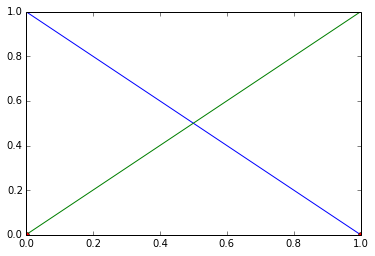

In [54]:
x = linspace(0,1,1025)
for d in range(dim):
    L = LL[d]
    q = Q[d]
    n = N[d]
    figure()
    for f in L:
        plot(x, f(x))
    plot(q, 0*q, 'ro')
    show()

# Two dimensional problems

Let's start by understanding **Tensor Product** structures

In [55]:
x = linspace(0,1,101)
y = linspace(0,1,201)

Let's define a **scalar function of two variables**:

In [56]:
g = lambda x,y: sin(2*pi*x)*cos(2*pi*y)

If you want to evaluate this function on **x** and **y**, for all combinations of the various x and y, then you have to make sure you **broadcast** them to have the same size. The following does exactly this:

In [57]:
Ge = zeros((len(y), len(x)))
for i in xrange(len(x)):
    for j in xrange(len(y)):
        Ge[j,i] = g(x[i], y[j])

In [58]:
X, Y = meshgrid(x,y) 
Gnumpy = g(X,Y)

error = Gnumpy-Ge
norm(error)

0.0

## Plotting 3d plots

A quick search on google gives us the following option:

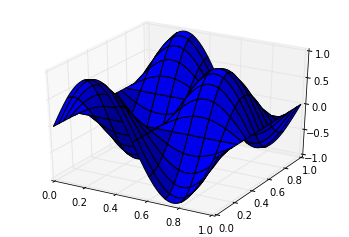

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,g(X,Y))

# Einstein notation in numpy

As python is a powerful language, especially in resembling the mathematical language, we expect its libraries to have powerful tools. We recommend the user to check [`einsum`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.einsum.html#numpy.einsum) documentation. Here we limit the discussion to the most meaningful examples.

In [60]:
a = arange(25).reshape(5,5)
b = arange(5)

In [61]:
print einsum('ij', a)
print einsum('ji', a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  5 10 15 20]
 [ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]]


In [62]:
print einsum('ij,j', a, b)
print np.dot(a, b)

[ 30  80 130 180 230]
[ 30  80 130 180 230]


In [63]:
z = arange(5)
w = arange(6)
print einsum('i...->i', z)
print einsum('i,j', z,w)
print einsum('i,j -> ij', z,w)
print einsum('i,j -> ji', z,w)

[0 1 2 3 4]
[[ 0  0  0  0  0  0]
 [ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]
 [ 0  4  8 12 16 20]]
[[ 0  0  0  0  0  0]
 [ 0  1  2  3  4  5]
 [ 0  2  4  6  8 10]
 [ 0  3  6  9 12 15]
 [ 0  4  8 12 16 20]]
[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]
 [ 0  4  8 12 16]
 [ 0  5 10 15 20]]


Use the `einsum` command for a smarter way to plot tensor product functions, remember that tensor product functions are of the form `g1(x)*g2(y)`

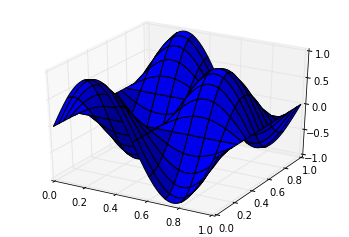

In [64]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

F = einsum('i,j -> ji', sin(2*pi*x), cos(2*pi*y))

ax.plot_surface(X,Y,F)

Try plotting $g(x,y) := l_3(x) l_4(y)$

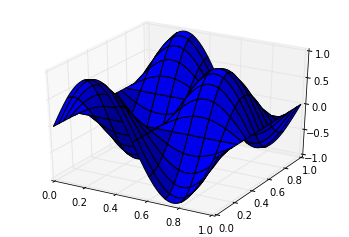

In [65]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

#F = einsum('i,j -> ji', LL[0][1](x), LL[1][2](y))

ax.plot_surface(X,Y,F)

# A two dimensional problem (without bc!)

Consider the following problem
$$
-\Delta u + u = f(s) \text{ in } [0,1]\times[0,1]
$$

And solve it using a tensor product vector space:

$$
V_h := \text{span} \{v_{ij}\}_{i,j = 0}^{n}, \qquad v_{ij}(\mathbf{x}) := l_i(x_1)l_j(x_2)
$$

a function in $V_h$ can be seen as a linear combination of $n_1\times n_2$ coeffients times the basis functions, and can be "unrolled" in a vector of dimension $1\times n_1 n_2$ or $n_1n_2 \times 1$ by a simple reshape, or by a `flatten` operation.

$$
u_h(x) := u^{ij}v_{ij} (x)
$$

and the Laplacian of $v_{ij}$ can be computed simply by:
$$
-\Delta v_{ij}(x) := -\sum_{k=1}^{d} \frac{\partial^2 v_{ij}}{\partial x_k^2}(x) = -l_i''(x_1)l_j(x_2) - l_i(x_1)l_j''(x_2)
$$

Now let's use $a,b,c,d$ for indices running over **collocation points** and $i,j,k,l,m$ for indices running over basis function indices.


Start by computing 
$$
A_{ib} := l_i(q_b)
$$
$$
B_{ib} := l'_i(q_b)
$$
$$
C_{ib} := l''_i(q_b)
$$

In [66]:
x = [linspace(0,1,101), linspace(0,1,101)]

AA = []
BB = []
CC = []
for d in range(dim):
    n = N[d]
    q = Q[d]
    nq = len(q)
    
    L = LL[d]
    L_prime = LL_prime[d]
    L_prime_prime = LL_prime_prime[d]
    
    A = zeros((nq,n))
    B = zeros((nq,n))
    C = zeros((nq,n))
    for i in range(n):
        A[:,i] = L[i](q)
        B[:,i] = L_prime[i](q)
        C[:,i] = L_prime_prime[i](q)
    AA += [A]
    BB += [B]
    CC += [C]

# How do we go from these matrices to higher dimensions?

Call $Q_{ij}$ the point $(q_i, q_j)$. Now we want to compute the laplacian in the $n_1\times n_2$ points $Q_{ij}$, to obtain a system of  $n_1\times n_2$ equations in  $n_1\times n_2$  unknown (the coefficients $u_{ij}$:

$$
-\Delta u_h(Q_{ab}) = -\Delta v_{ij}(Q_{ab}) u^{ij} = (-l_i''(q_a)l_j(q_b) - l_i(q_a)l_j''(q_b)) u^{ij} =: L_{iajb} u^{ij}
$$

The $M$ "matrix":
$$
u_h(Q_{ab}) :=  v_{ij}(Q_{ab})u^{ij} = l_i(q_a)l_j(q_b) u^{ij}= \delta_{iajb}u^{ij}
$$

$$
(S:=L+M)_{iajb} u^{ij} = f(Q_{ab})
$$

In [67]:
def eval_space(LL,U):
    def eval_sp(LL,U,x,y):
        (ny,nx) = U.shape
        val = 0
        for i in arange(nx):
            for j in arange(ny):
                val += U[j,i]*LL[0][i](x)*LL[1][j](y)
        return val        
    return lambda x,y : eval_sp(LL,U,x,y)

### Control

The same procedure that applied for the one dimensional case, applies also in two dimensions. Given $g(x,y)\in V_h$. Consider $x_i = \{0,1/2,1\}$, $y_i = \{0,1\}$. To simplify the notation $u_h:= u^{i,j} l_i(x)\,m_j(y)$

$$
\left(
\begin{array}{c}
g''(x_0,y_0) \\
g''(x_1,y_0) \\
g''(x_2,y_0) \\
g''(x_0,y_1) \\
g''(x_1,y_1) \\
g''(x_2,y_1) \\
\end{array}
\right)=
\left(
\begin{array}{ccc ccc}
l''_0(x_0)\,m_0(y_0)  & l''_1(x_0)\,m_0(y_0) & l''_2(x_0)\,m_0(y_0) & 
l''_0(x_0)\,m_1(y_0)  & l''_1(x_0)\,m_1(y_0) & l''_2(x_0)\,m_1(y_0) \\
l''_0(x_1)\,m_0(y_0)  & l''_1(x_1)\,m_0(y_0) & l''_2(x_1)\,m_0(y_0) & 
l''_0(x_1)\,m_1(y_0)  & l''_1(x_1)\,m_1(y_0) & l''_2(x_1)\,m_1(y_0) \\
l''_0(x_2)\,m_0(y_0)  & l''_1(x_2)\,m_0(y_0) & l''_2(x_2)\,m_0(y_0) & 
l''_0(x_2)\,m_1(y_0)  & l''_1(x_2)\,m_1(y_0) & l''_2(x_2)\,m_1(y_0) \\
l''_0(x_0)\,m_0(y_1)  & l''_1(x_0)\,m_0(y_1) & l''_2(x_0)\,m_0(y_1) &  
l''_0(x_0)\,m_1(y_1)  & l''_1(x_0)\,m_1(y_1) & l''_2(x_0)\,m_1(y_1) \\
l''_0(x_1)\,m_0(y_1)  & l''_1(x_1)\,m_0(y_1) & l''_2(x_1)\,m_0(y_1) & 
l''_0(x_1)\,m_1(y_1)  & l''_1(x_1)\,m_1(y_1) & l''_2(x_1)\,m_1(y_1) \\
l''_0(x_2)\,m_0(y_1)  & l''_1(x_2)\,m_0(y_1) & l''_2(x_2)\,m_0(y_1) & 
l''_0(x_2)\,m_1(y_1)  & l''_1(x_2)\,m_1(y_1) & l''_2(x_2)\,m_1(y_1) \\
\end{array}
\right)
\left(
\begin{array}{c}
g(x_0,y_0) \\
g(x_1,y_0) \\
g(x_2,y_0) \\
g(x_0,y_1) \\
g(x_1,y_1) \\
g(x_2,y_1) \\
\end{array}
\right)
$$

$$
\left(
\begin{array}{c}
g''(x_0,y_0) \\
g''(x_1,y_0) \\
g''(x_2,y_0) \\
g''(x_0,y_1) \\
g''(x_1,y_1) \\
g''(x_2,y_1) \\
\end{array}
\right)=
\underbrace{
\left(
\begin{array}{ccc ccc}
4  & -8 & 4 & 0  & 0 & 0 \\
4  & -8 & 4 & 0  & 0 & 0 \\
4  & -8 & 4 & 0  & 0 & 0 \\
0  &  0 & 0 & 4  & -8 & 4 \\
0  &  0 & 0 & 4  & -8 & 4 \\
0  &  0 & 0 & 4  & -8 & 4 \\
\end{array}
\right)}_{\mathtt{L1}}
\left(
\begin{array}{c}
g(x_0,y_0) \\
g(x_1,y_0) \\
g(x_2,y_0) \\
g(x_0,y_1) \\
g(x_1,y_1) \\
g(x_2,y_1) \\
\end{array}
\right)
$$
The ordering is lexicographic ordering. We aim at building \texttt{L1}, starting from:
$$
l_{ia} = \left(
\begin{array}{ccc}
4 & -8 & 4\\
4 & -8 & 4\\
4 & -8 & 4
\end{array}
\right), \quad
m_{jb} = \left(
\begin{array}{cc}
1 & 0\\
0 & 1
\end{array}
\right)
$$

## Wrong Version

In [82]:
L1 = einsum('ia,jb -> ijba', CC[0], AA[1])
print(L1[0])
L1 = L1.reshape((N[0]*N[1], -1))
print(L1)

[[[ 4. -8.  4.]
  [ 0.  0.  0.]]

 [[ 4. -8.  4.]
  [ 0.  0.  0.]]

 [[ 4. -8.  4.]
  [ 0.  0.  0.]]]
[[ 4. -8.  4.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.  0.]
 [ 0.  0.  0.  4. -8.  4.]
 [ 0.  0.  0.  4. -8.  4.]
 [ 0.  0.  0.  4. -8.  4.]]


## Correct Version

In [79]:
L1 = einsum('ia,jb->jiba', CC[0], AA[1])
print(L1)
L2 = einsum('ia,jb->jiba', AA[0], CC[1])
M  = einsum('ia,jb->jiba', AA[0], AA[1])
L1 = L1.reshape((N[0]*N[1], -1))
print(L1)
L2 = L2.reshape((N[0]*N[1], -1))
M  =  M.reshape((N[0]*N[1], -1))

[[[[ 4. -8.  4.]
   [ 0.  0.  0.]]

  [[ 4. -8.  4.]
   [ 0.  0.  0.]]

  [[ 4. -8.  4.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 4. -8.  4.]]

  [[ 0.  0.  0.]
   [ 4. -8.  4.]]

  [[ 0.  0.  0.]
   [ 4. -8.  4.]]]]
[[ 4. -8.  4.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.  0.]
 [ 4. -8.  4.  0.  0.  0.]
 [ 0.  0.  0.  4. -8.  4.]
 [ 0.  0.  0.  4. -8.  4.]
 [ 0.  0.  0.  4. -8.  4.]]


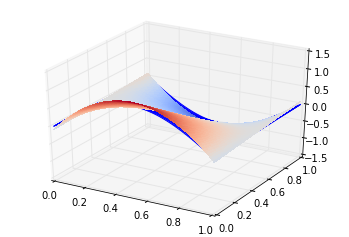

In [70]:
alpha = 100.

S = -L1-L2+alpha*M

s = lambda x,y : sin(pi*x)*cos(pi*y)
g = lambda x,y : alpha*sin(pi*x)*cos(pi*y) + 2*pi**2*sin(pi*x)*cos(pi*y)

Qx, Qy = meshgrid(Q[0],Q[1])

G = g(Qx,Qy).flatten()

u = linalg.solve(S, G)

U = u.reshape((N[1],N[0]))

uh = eval_space(LL,U)

X,Y = meshgrid(linspace(0,1,100),linspace(0,1,100))
fig = figure()
ax = fig.gca(projection='3d')

surf0 = ax.plot_wireframe(X, Y, s(X,Y))
surf1 = ax.plot_surface(X, Y, uh(X,Y), rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)